In [9]:
import numpy as np
import torch
import torchvision
import torch.nn as nn

In [10]:
device = "mps" 
print (device)

mps


In [11]:
from torchvision.transforms import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


train_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize,transforms.RandomHorizontalFlip()])

test_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize])

In [12]:
images_path = torchvision.datasets.ImageFolder("/Users/vaibhavmk/Downloads/marinefull",transform = train_transform)
len(images_path)

13711

In [13]:
a = 3000
image_train,image_test = torch.utils.data.random_split(images_path,(13711-a,a))

In [14]:
from tqdm import   tqdm
main_lib = []
faster = []


for main in tqdm(enumerate(image_test)):
    
    faster.append(main[1])
  



for i in range(len(images_path.classes)):
    mini_main = []
    for main in faster:
        if main[1]== i:
            mini_main.append(main)
           
        else:
            pass
    main_lib.append(mini_main)
    
global_test =[]            
for g in main_lib:
    for b in g:
        global_test.append(b)
        



3000it [00:03, 861.58it/s]


In [15]:
train_loader = torch.utils.data.DataLoader(image_train,shuffle = True,batch_size = 32)
test_loader = torch.utils.data.DataLoader(global_test,shuffle = False,batch_size = 64)


In [16]:
print("Total Image: ",len(images_path))
print("Train Image: ",len(image_train))
print("Test Image: ",len(image_test))
print("Train len batch: ",len(train_loader))
print("Test len batch: ",len(test_loader))

Total Image:  13711
Train Image:  10711
Test Image:  3000
Train len batch:  335
Test len batch:  47


In [17]:
model = torchvision.models.resnet50(pretrained = True).to(device)

for param in model.parameters():
    param.requires_grad = False
lastLayer = model.fc.in_features  #2048


model.fc = nn.Sequential(nn.Linear(2048,256),
                        nn.ReLU(inplace = True),
                         
                         
                        nn.Linear(256,len(images_path.classes))).to(device)


/Users/vaibhavmk/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vaibhavmk/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
epoch = 25
optimizer = torch.optim.Adam(model.fc.parameters(),lr = 0.003)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor = 0.001,patience= 5, verbose = True)

In [19]:
from sklearn.metrics import f1_score
upper= np.inf

train_loss_graph = []
test_loss_graph = []
acc_graph = []

for epochs in range(epoch):
    model.train()
    train_loss = 0
    test_loss = 0
    acc = 0
    b= 0
    for img,label in train_loader:
        
        b+= 1
    
        img,label = img.to(device),label.to(device)
        
        output = model(img)
        loss = criterion(output,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()* img.size(0)
    train_loss_graph.append(train_loss / len(image_train))
        
    model.eval()
   
    for test_img,test_label in test_loader:
        b+= 1
        
        test_img,test_label = test_img.to(device),test_label.to(device)
        
        test_output = model(test_img)
        
        test_loss_counter = criterion(test_output,test_label)
        
        test_loss += test_loss_counter.item() * test_img.size(0)
        _,pred = torch.max(test_output,1)
        correct = torch.sum(pred == test_label.data)
        
        
        acc += correct
        
    acc_graph.append(acc.cpu()/len(image_test))
    test_loss_graph.append(test_loss/len(image_test))
    test_upper = test_loss/len( image_test)
    scheduler.step(test_upper)
    
    if test_upper < upper:
        print(f"MODEL SAVED {upper} -------> {test_upper}")
        print(f"Epoch:{epochs}/{epoch} -----> Train Loss = {train_loss / len(image_train)} Test Loss = {test_loss/len(image_test)} ACC = {acc /len(image_test)}")
        upper = test_upper
        torch.save(model.state_dict(),'/Users/vaibhavmk/Downloads/animalClassfiction1.pth')
        


    else:
        print(f"Epoch: {epochs}/{epoch} -----> Train Loss = {train_loss / len(image_train)} Test Loss = {test_loss/len(image_test)} ACC = {acc /len(image_test)}")
        
        
        
    





MODEL SAVED inf -------> 1.03966281636556
Epoch:0/25 -----> Train Loss = 1.3206873017748177 Test Loss = 1.03966281636556 ACC = 0.6833333373069763
MODEL SAVED 1.03966281636556 -------> 0.9526613348325094
Epoch:1/25 -----> Train Loss = 1.0067803087872 Test Loss = 0.9526613348325094 ACC = 0.7223333120346069
MODEL SAVED 0.9526613348325094 -------> 0.9308178413709005
Epoch:2/25 -----> Train Loss = 0.928197528821571 Test Loss = 0.9308178413709005 ACC = 0.7260000109672546
MODEL SAVED 0.9308178413709005 -------> 0.9218657058080038
Epoch:3/25 -----> Train Loss = 0.8733108202267645 Test Loss = 0.9218657058080038 ACC = 0.7296666502952576
Epoch: 4/25 -----> Train Loss = 0.8475854766740595 Test Loss = 0.9614320025444031 ACC = 0.7146666646003723
Epoch: 5/25 -----> Train Loss = 0.838269318934193 Test Loss = 0.9689698703686396 ACC = 0.7196666598320007
Epoch: 6/25 -----> Train Loss = 0.7897742347561025 Test Loss = 0.9864138351281484 ACC = 0.7166666388511658
Epoch: 7/25 -----> Train Loss = 0.79820169812

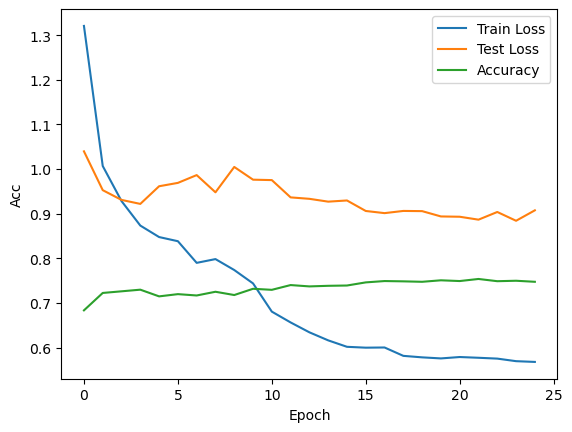

In [20]:
import matplotlib.pyplot as plt

plt.plot(train_loss_graph)
plt.plot(test_loss_graph)
plt.plot(acc_graph)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(["Train Loss","Test Loss","Accuracy"])
plt.show()

In [21]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
from torchvision.transforms import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


train_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize,transforms.RandomHorizontalFlip()])

test_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize])
images_path = torchvision.datasets.ImageFolder("/Users/vaibhavmk/Downloads/marinefull",transform = train_transform)
len(images_path)
model = torchvision.models.resnet50(pretrained = False)
lassLayer = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(lassLayer,256),
                         nn.ReLU(inplace = True),
                         
                         
                         
                         nn.Linear(256,len(images_path.classes)))

                                   
model.load_state_dict(torch.load("/Users/vaibhavmk/Downloads/animalClassfiction1.pth"))                                   
                                                            
                               

/Users/vaibhavmk/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vaibhavmk/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [22]:
from PIL import Image  
test_paths = ["/Users/vaibhavmk/Downloads/campics/test2.jpg"]
img_testing = [Image.open(a) for a in test_paths]

stacked = torch.stack([test_transform(g) for g in img_testing])








In [23]:
with torch.no_grad():
    model.eval()
    output = model(stacked)
    output = nn.functional.softmax(output,dim = 1)
    
class_names = images_path.classes    

accur_name = ["whale","Turtle_Tortoise","Starfish","squid","shrimp","sharks","seal","seahorse","sea urchin","sea ray","puffer","penguin","otter","octopus","nudibranch","lobster","jelly fish","fish","eel","dolphin","crabs","corals"]

Octopus


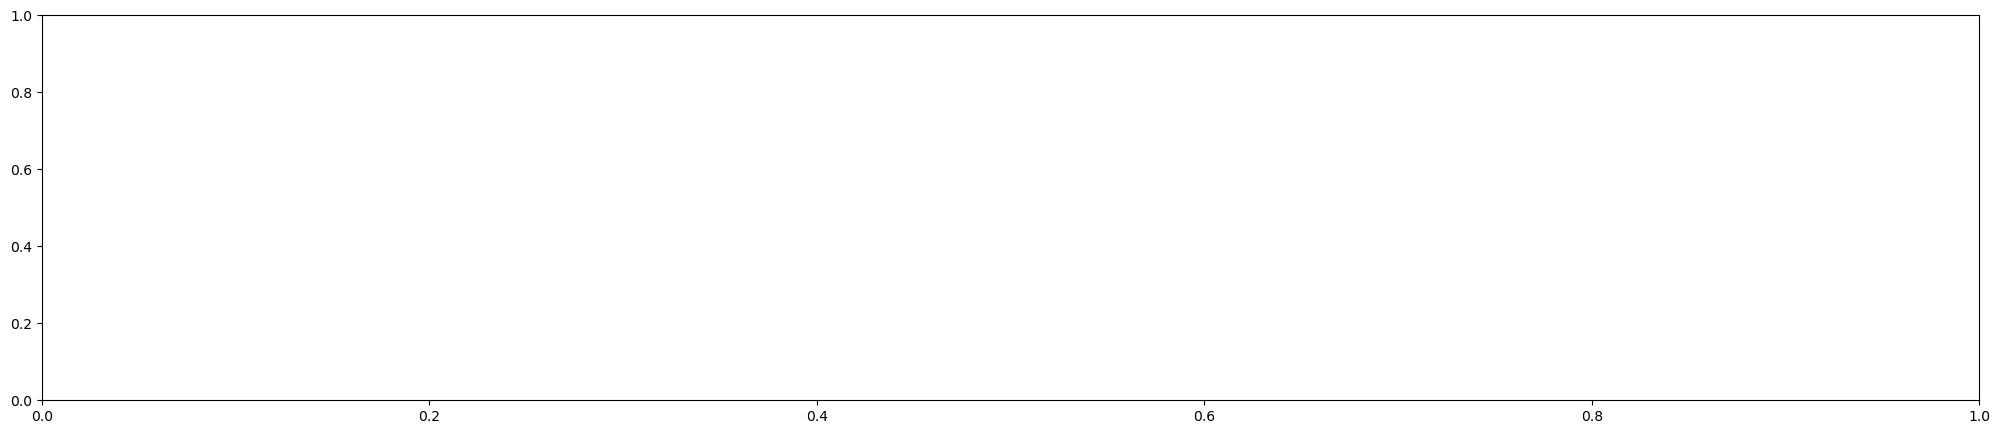

In [24]:
with torch.no_grad():
    model.eval()
    output = model(stacked)
    output = nn.functional.softmax(output,dim = 1)
    
class_names = images_path.classes    


accur_name = ["whale","Turtle_Tortoise","Starfish","squid","shrimp","sharks","seal","seahorse","sea urchin","sea ray","puffer","penguin","otter","octopus","nudibranch","lobster","jelly fish","fish","eel","dolphin","crabs","corals"]
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,1,figsize =(25,5))
print(class_names[np.argmax(output[0])])

ax = axs


In [25]:
from PIL import Image, ImageDraw, ImageFont

def overlay_text(image_path, text, output_path):
    image = Image.open(image_path)
    
    draw = ImageDraw.Draw(image)
    
    font = ImageFont.load_default()  
    
    text_width, text_height = draw.textsize(text, font)
    position = ((image.width - text_width) // 2, (image.height - text_height) // 1.1)
    
    draw.text(position, text, fill="red", font=font)
    
    image.save(output_path)

image_path = "/Users/vaibhavmk/Downloads/campics/captured_image.jpg"
text = class_names[np.argmax(output[0])]
output_path = "/Users/vaibhavmk/Downloads/campics/test1.jpg"
ax.imshow(Image.open(output_path))
overlay_text(image_path, text, output_path)


/var/folders/b_/101911wx33v9vn6byy35y9380000gn/T/ipykernel_55445/3541335133.py:10: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)


In [4]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
from torchvision.transforms import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


train_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize,transforms.RandomHorizontalFlip()])

test_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize])
images_path = torchvision.datasets.ImageFolder("/Users/vaibhavmk/Downloads/marinefull",transform = train_transform)
len(images_path)
model = torchvision.models.resnet50(pretrained = False)
lassLayer = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(lassLayer,256),
                         nn.ReLU(inplace = True),
                         
                         
                         
                         nn.Linear(256,len(images_path.classes)))

                                   
model.load_state_dict(torch.load("/Users/vaibhavmk/Downloads/animalClassfiction1.pth"))                                   
                                              
import cv2
import time
from PIL import Image 

def capture_and_save_frame(video_capture,output_path):
    frame_number = 0
    while True:
        ret, frame = video_capture.read()

        if not ret:
            break

        cv2.imwrite(output_path, frame)
         

        test_paths =['/Users/vaibhavmk/Downloads/campics/test1.jpg']
        img_testing = [Image.open(a) for a in test_paths]

        stacked = torch.stack([test_transform(g) for g in img_testing])





        with torch.no_grad():
            model.eval()
            output = model(stacked)
            output = nn.functional.softmax(output,dim = 1)
    
        class_names = images_path.classes    

        cv2.putText(frame, class_names[np.argmax(output[0])], (200, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4)
 
        cv2.imshow('Quantum Aquatica', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            break
        frame_number += 1

        time.sleep(0.01)


video_capture = cv2.VideoCapture(0)

output_path = '/Users/vaibhavmk/Downloads/campics/test1.jpg'


capture_and_save_frame(video_capture,output_path)


Final Code Run (Goggles Preview)

In [ ]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
from torchvision.transforms import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


train_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize,transforms.RandomHorizontalFlip()])

test_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor(),normalize])
images_path = torchvision.datasets.ImageFolder("/Users/vaibhavmk/Downloads/marinefull",transform = train_transform)
len(images_path)
model = torchvision.models.resnet50(pretrained = False)
lassLayer = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(lassLayer,256),
                         nn.ReLU(inplace = True),
                         
                         
                         
                         nn.Linear(256,len(images_path.classes)))

                                   
model.load_state_dict(torch.load("/Users/vaibhavmk/Downloads/animalClassfiction1.pth"))                                   
                                              
import cv2
import time
from PIL import Image 
scale_factor = 0.8

def capture_and_save_frame(video_capture,output_path):
    frame_number = 0
    while True:
        ret, frame = video_capture.read()

        if not ret:
            break

        cv2.imwrite(output_path, frame)
         

        test_paths =['/Users/vaibhavmk/Downloads/campics/test1.jpg']
        img_testing = [Image.open(a) for a in test_paths]

        stacked = torch.stack([test_transform(g) for g in img_testing])





        with torch.no_grad():
            model.eval()
            output = model(stacked)
            output = nn.functional.softmax(output,dim = 1)
    
        class_names = images_path.classes    
 
        cv2.putText(frame, class_names[np.argmax(output[0])], (400, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4)

  
        sframe = cv2.resize(frame, None, fx=3.6, fy=3.6)
        cv2.resizeWindow("Resized_Window", 300, 700) 
        cv2.imshow('Quantum Aquatica', sframe)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            break
        frame_number += 1

        time.sleep(0.01)

video_path ='/Users/vaibhavmk/Downloads/VID-20240221-WA0004.mp4'
video_capture = cv2.VideoCapture(video_path)

output_path = '/Users/vaibhavmk/Downloads/campics/test1.jpg'

capture_and_save_frame(video_capture,output_path)
